In [1]:
import nltk
import pandas as pd
import numpy as np
import re
from nltk.tokenize import word_tokenize

# This will help view all the text
pd.set_option('display.max_colwidth', None)

In [2]:
# Load the sample corpus
data = pd.read_csv('ups_data.csv')
data

,date,id,content,username,like_count,retweet_count
0,2023-06-06 19:39:47+00:00,1666168023336534016,"@ErinInTheMorn “Medical authority” (only in the US and Canada btw, they’re completely disregarding European med authorities)\n\nNot medical science. \n\nHuge difference\n\nIf this medicine is so beneficial then why don’t any of the dozens of gender clinics around the US perform long term follow ups?",AwakeBPS,0,0
1,2023-06-06 19:38:45+00:00,1666167764392763393,"Our 2023 🌳🍎☀️WELLNESS WALK️ ☀️🍎🌳 was a huge hit! Friends, food, &amp; nature — WHAT COULD BE BETTER? 😊 \n\nBIG SHOUTOUT to our AMAZING VOLUNTEERS from @UPS_Canada @MorganStanley @TIRFrugby &amp; @TorontoMet ! The kids had a blast 🙌\n\n#beyond330 #toronto https://t.co/sp8rKOWpv0",TFSS_,0,0
2,2023-06-06 19:33:01+00:00,1666166320826572804,"@mark_shteinberg Hello, we are truly sorry for the inconvenience caused. We would like to help you, could you send us your tracking number, email address, address and phone number via DM? -Bryan https://t.co/gZZ8qDnrVA",UPS_Canada,0,0
3,2023-06-06 19:26:13+00:00,1666164611538735109,@HatTrickREI @UPS Same here in the great Southern Ontario Canada.,rogerms12,1,0
4,2023-06-06 18:54:59+00:00,1666156751404531719,@TheNamibian #harmony World 🌍 futuristic Julia Naimbale from Namibia 🇳🇦 Julia say ladies don’t have male elders here and from Uganda and China on your prostate ups!,JuliaMe68293271,0,0
...,...,...,...,...,...,...
9994,2022-06-21 19:43:49+00:00,1539333287231078400,@UPS @UPS_Canada is just SUCH a scummy company literally fighting for my life to get my package from them because they refuse to do their job correctly yet they had no problem taking almost $200 to deliver it yet havebi seen the package?,PirateHempress,0,0
9995,2022-06-21 18:09:52+00:00,1539309643448606720,"@UPS It's not about being sorry for the package not in my hands yet. The issue is your polices are making customers do YOUR work. The last I checked in Canada, Canadian dollars is an acceptable form of payment, why don't you accept cash?",AttilaVinczer,0,0
9996,2022-06-21 18:04:31+00:00,1539308297681276928,On June 15&amp;16 Village staff planted trees within the limits of the 20-metre-wide municipal street right-of way at selected locations.\nWe sincerely thank Tree Canada &amp; UPS for the opportunity to work together in pursuing a greener and healthier living environment for our citizens. https://t.co/3AKQoAxJyu,VLGNewMaryland,1,0
9997,2022-06-21 16:01:53+00:00,1539277436684222465,"@beautifulgalles Hi there, we would really like to help you out. Could you please contact us through DM? If you hand us your personal info. and your parcel's details we would gladly assist you. -Laura https://t.co/gZZ8qDnrVA",UPS_Canada,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           9999 non-null   object
 1   id             9999 non-null   int64 
 2   content        9999 non-null   object
 3   username       9999 non-null   object
 4   like_count     9999 non-null   int64 
 5   retweet_count  9999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 468.8+ KB


In [4]:
data.describe()

,id,like_count,retweet_count
count,9.999000e+03,9999.000000,9999.000000
mean,1.600182e+18,3.023802,0.560556
std,3.502597e+16,25.911610,5.980039
min,1.539269e+18,0.000000,0.000000
25%,1.571561e+18,0.000000,0.000000
50%,1.598787e+18,0.000000,0.000000
75%,1.630271e+18,1.000000,0.000000
max,1.666168e+18,970.000000,320.000000


In [5]:
data.nunique()

date             9973
id               9999
content          9909
username         5362
like_count        113
retweet_count      51
dtype: int64

In [6]:
ups_df = data

### Handling user handles, links, and emoticons

In [7]:
# Defining regular expressions for user handles and links
user_handle_regex = r'@[\w_]+'
link_regex = r'https?://\S+'

# Defining a dictionary mapping emoticons to their respective feelings
emoticons_mapping = {
    ':)': 'happy',
    ':(': 'sad',
    ':D': 'laugh',
    ':P': 'playful',
    ';)': 'wink',
    ':|': 'neutral',
    ':O': 'surprised',
    ':*': 'kiss',
    ':/': 'confused',
    ':)': 'smile',
    ':\'(': 'cry',
    '$': 'pricing'
}

In [8]:
# Function to replace user handles with '@user'
def replace_user_handles(text):
    return re.sub(user_handle_regex, '@user', text)

# Function to replace links with 'http'
def replace_links(text):
    return re.sub(link_regex, 'http', text)

# Function to replace emoticons with their respective feeling
def replace_emoticons(text):
    for emoticon, feeling in emoticons_mapping.items():
        text = text.replace(emoticon, feeling)
    return text

In [9]:
# Apply the transformations to the 'tweet' column
ups_df['content'] = ups_df['content'].apply(replace_user_handles)
ups_df['content'] = ups_df['content'].apply(replace_links)
ups_df['content'] = ups_df['content'].apply(replace_emoticons)

In [10]:
ups_df.head()

,date,id,content,username,like_count,retweet_count
0,2023-06-06 19:39:47+00:00,1666168023336534016,"@user “Medical authority” (only in the US and Canada btw, they’re completely disregarding European med authorities)\n\nNot medical science. \n\nHuge difference\n\nIf this medicine is so beneficial then why don’t any of the dozens of gender clinics around the US perform long term follow ups?",AwakeBPS,0,0
1,2023-06-06 19:38:45+00:00,1666167764392763393,"Our 2023 🌳🍎☀️WELLNESS WALK️ ☀️🍎🌳 was a huge hit! Friends, food, &amp; nature — WHAT COULD BE BETTER? 😊 \n\nBIG SHOUTOUT to our AMAZING VOLUNTEERS from @user @user @user &amp; @user ! The kids had a blast 🙌\n\n#beyond330 #toronto http",TFSS_,0,0
2,2023-06-06 19:33:01+00:00,1666166320826572804,"@user Hello, we are truly sorry for the inconvenience caused. We would like to help you, could you send us your tracking number, email address, address and phone number via DM? -Bryan http",UPS_Canada,0,0
3,2023-06-06 19:26:13+00:00,1666164611538735109,@user @user Same here in the great Southern Ontario Canada.,rogerms12,1,0
4,2023-06-06 18:54:59+00:00,1666156751404531719,@user #harmony World 🌍 futuristic Julia Naimbale from Namibia 🇳🇦 Julia say ladies don’t have male elders here and from Uganda and China on your prostate ups!,JuliaMe68293271,0,0


In [11]:
ups_df.drop(['date','id','username','like_count','retweet_count'],axis=1,inplace=True)

In [12]:
ups_df.head()

,content
0,"@user “Medical authority” (only in the US and Canada btw, they’re completely disregarding European med authorities)\n\nNot medical science. \n\nHuge difference\n\nIf this medicine is so beneficial then why don’t any of the dozens of gender clinics around the US perform long term follow ups?"
1,"Our 2023 🌳🍎☀️WELLNESS WALK️ ☀️🍎🌳 was a huge hit! Friends, food, &amp; nature — WHAT COULD BE BETTER? 😊 \n\nBIG SHOUTOUT to our AMAZING VOLUNTEERS from @user @user @user &amp; @user ! The kids had a blast 🙌\n\n#beyond330 #toronto http"
2,"@user Hello, we are truly sorry for the inconvenience caused. We would like to help you, could you send us your tracking number, email address, address and phone number via DM? -Bryan http"
3,@user @user Same here in the great Southern Ontario Canada.
4,@user #harmony World 🌍 futuristic Julia Naimbale from Namibia 🇳🇦 Julia say ladies don’t have male elders here and from Uganda and China on your prostate ups!


### Lowercase tweets

In [13]:
ups_df['content'] = ups_df['content'].str.lower()

In [14]:
ups_df.head()

,content
0,"@user “medical authority” (only in the us and canada btw, they’re completely disregarding european med authorities)\n\nnot medical science. \n\nhuge difference\n\nif this medicine is so beneficial then why don’t any of the dozens of gender clinics around the us perform long term follow ups?"
1,"our 2023 🌳🍎☀️wellness walk️ ☀️🍎🌳 was a huge hit! friends, food, &amp; nature — what could be better? 😊 \n\nbig shoutout to our amazing volunteers from @user @user @user &amp; @user ! the kids had a blast 🙌\n\n#beyond330 #toronto http"
2,"@user hello, we are truly sorry for the inconvenience caused. we would like to help you, could you send us your tracking number, email address, address and phone number via dm? -bryan http"
3,@user @user same here in the great southern ontario canada.
4,@user #harmony world 🌍 futuristic julia naimbale from namibia 🇳🇦 julia say ladies don’t have male elders here and from uganda and china on your prostate ups!


### Tokenize tweets

In [15]:
ups_df['tokenized_content'] = ups_df['content'].apply(word_tokenize)

In [16]:
ups_df.head()

,content,tokenized_content
0,"@user “medical authority” (only in the us and canada btw, they’re completely disregarding european med authorities)\n\nnot medical science. \n\nhuge difference\n\nif this medicine is so beneficial then why don’t any of the dozens of gender clinics around the us perform long term follow ups?","[@, user, “, medical, authority, ”, (, only, in, the, us, and, canada, btw, ,, they, ’, re, completely, disregarding, european, med, authorities, ), not, medical, science, ., huge, difference, if, this, medicine, is, so, beneficial, then, why, don, ’, t, any, of, the, dozens, of, gender, clinics, around, the, us, perform, long, term, follow, ups, ?]"
1,"our 2023 🌳🍎☀️wellness walk️ ☀️🍎🌳 was a huge hit! friends, food, &amp; nature — what could be better? 😊 \n\nbig shoutout to our amazing volunteers from @user @user @user &amp; @user ! the kids had a blast 🙌\n\n#beyond330 #toronto http","[our, 2023, 🌳🍎☀️wellness, walk️, ☀️🍎🌳, was, a, huge, hit, !, friends, ,, food, ,, &, amp, ;, nature, —, what, could, be, better, ?, 😊, big, shoutout, to, our, amazing, volunteers, from, @, user, @, user, @, user, &, amp, ;, @, user, !, the, kids, had, a, blast, 🙌, #, beyond330, #, toronto, http]"
2,"@user hello, we are truly sorry for the inconvenience caused. we would like to help you, could you send us your tracking number, email address, address and phone number via dm? -bryan http","[@, user, hello, ,, we, are, truly, sorry, for, the, inconvenience, caused, ., we, would, like, to, help, you, ,, could, you, send, us, your, tracking, number, ,, email, address, ,, address, and, phone, number, via, dm, ?, -bryan, http]"
3,@user @user same here in the great southern ontario canada.,"[@, user, @, user, same, here, in, the, great, southern, ontario, canada, .]"
4,@user #harmony world 🌍 futuristic julia naimbale from namibia 🇳🇦 julia say ladies don’t have male elders here and from uganda and china on your prostate ups!,"[@, user, #, harmony, world, 🌍, futuristic, julia, naimbale, from, namibia, 🇳🇦, julia, say, ladies, don, ’, t, have, male, elders, here, and, from, uganda, and, china, on, your, prostate, ups, !]"


### Removing Punctuations

In [17]:
import string

ups_df['tokenized_content'] = ups_df['tokenized_content'].apply(lambda tokens:
                                                              [token for token in tokens if token not in string.punctuation])

In [18]:
ups_df.head()

,content,tokenized_content
0,"@user “medical authority” (only in the us and canada btw, they’re completely disregarding european med authorities)\n\nnot medical science. \n\nhuge difference\n\nif this medicine is so beneficial then why don’t any of the dozens of gender clinics around the us perform long term follow ups?","[user, “, medical, authority, ”, only, in, the, us, and, canada, btw, they, ’, re, completely, disregarding, european, med, authorities, not, medical, science, huge, difference, if, this, medicine, is, so, beneficial, then, why, don, ’, t, any, of, the, dozens, of, gender, clinics, around, the, us, perform, long, term, follow, ups]"
1,"our 2023 🌳🍎☀️wellness walk️ ☀️🍎🌳 was a huge hit! friends, food, &amp; nature — what could be better? 😊 \n\nbig shoutout to our amazing volunteers from @user @user @user &amp; @user ! the kids had a blast 🙌\n\n#beyond330 #toronto http","[our, 2023, 🌳🍎☀️wellness, walk️, ☀️🍎🌳, was, a, huge, hit, friends, food, amp, nature, —, what, could, be, better, 😊, big, shoutout, to, our, amazing, volunteers, from, user, user, user, amp, user, the, kids, had, a, blast, 🙌, beyond330, toronto, http]"
2,"@user hello, we are truly sorry for the inconvenience caused. we would like to help you, could you send us your tracking number, email address, address and phone number via dm? -bryan http","[user, hello, we, are, truly, sorry, for, the, inconvenience, caused, we, would, like, to, help, you, could, you, send, us, your, tracking, number, email, address, address, and, phone, number, via, dm, -bryan, http]"
3,@user @user same here in the great southern ontario canada.,"[user, user, same, here, in, the, great, southern, ontario, canada]"
4,@user #harmony world 🌍 futuristic julia naimbale from namibia 🇳🇦 julia say ladies don’t have male elders here and from uganda and china on your prostate ups!,"[user, harmony, world, 🌍, futuristic, julia, naimbale, from, namibia, 🇳🇦, julia, say, ladies, don, ’, t, have, male, elders, here, and, from, uganda, and, china, on, your, prostate, ups]"


### Removing Stopwords

In [19]:
from nltk.corpus import stopwords

In [20]:
stop_words = set(stopwords.words('english'))

ups_df['tokenized_content'] = ups_df['tokenized_content'].apply(lambda tokens:
                                                              [token for token in tokens if token.lower() not in stop_words])

In [21]:
ups_df.head()

,content,tokenized_content
0,"@user “medical authority” (only in the us and canada btw, they’re completely disregarding european med authorities)\n\nnot medical science. \n\nhuge difference\n\nif this medicine is so beneficial then why don’t any of the dozens of gender clinics around the us perform long term follow ups?","[user, “, medical, authority, ”, us, canada, btw, ’, completely, disregarding, european, med, authorities, medical, science, huge, difference, medicine, beneficial, ’, dozens, gender, clinics, around, us, perform, long, term, follow, ups]"
1,"our 2023 🌳🍎☀️wellness walk️ ☀️🍎🌳 was a huge hit! friends, food, &amp; nature — what could be better? 😊 \n\nbig shoutout to our amazing volunteers from @user @user @user &amp; @user ! the kids had a blast 🙌\n\n#beyond330 #toronto http","[2023, 🌳🍎☀️wellness, walk️, ☀️🍎🌳, huge, hit, friends, food, amp, nature, —, could, better, 😊, big, shoutout, amazing, volunteers, user, user, user, amp, user, kids, blast, 🙌, beyond330, toronto, http]"
2,"@user hello, we are truly sorry for the inconvenience caused. we would like to help you, could you send us your tracking number, email address, address and phone number via dm? -bryan http","[user, hello, truly, sorry, inconvenience, caused, would, like, help, could, send, us, tracking, number, email, address, address, phone, number, via, dm, -bryan, http]"
3,@user @user same here in the great southern ontario canada.,"[user, user, great, southern, ontario, canada]"
4,@user #harmony world 🌍 futuristic julia naimbale from namibia 🇳🇦 julia say ladies don’t have male elders here and from uganda and china on your prostate ups!,"[user, harmony, world, 🌍, futuristic, julia, naimbale, namibia, 🇳🇦, julia, say, ladies, ’, male, elders, uganda, china, prostate, ups]"


### Lemmatization

In [22]:
from nltk.stem import WordNetLemmatizer

In [23]:
lemmatizer = WordNetLemmatizer()

ups_df['tokenized_content'] = ups_df['tokenized_content'].apply(lambda tokens:
                                                              [lemmatizer.lemmatize(token) for token in tokens])

In [24]:
ups_df.head()

,content,tokenized_content
0,"@user “medical authority” (only in the us and canada btw, they’re completely disregarding european med authorities)\n\nnot medical science. \n\nhuge difference\n\nif this medicine is so beneficial then why don’t any of the dozens of gender clinics around the us perform long term follow ups?","[user, “, medical, authority, ”, u, canada, btw, ’, completely, disregarding, european, med, authority, medical, science, huge, difference, medicine, beneficial, ’, dozen, gender, clinic, around, u, perform, long, term, follow, ups]"
1,"our 2023 🌳🍎☀️wellness walk️ ☀️🍎🌳 was a huge hit! friends, food, &amp; nature — what could be better? 😊 \n\nbig shoutout to our amazing volunteers from @user @user @user &amp; @user ! the kids had a blast 🙌\n\n#beyond330 #toronto http","[2023, 🌳🍎☀️wellness, walk️, ☀️🍎🌳, huge, hit, friend, food, amp, nature, —, could, better, 😊, big, shoutout, amazing, volunteer, user, user, user, amp, user, kid, blast, 🙌, beyond330, toronto, http]"
2,"@user hello, we are truly sorry for the inconvenience caused. we would like to help you, could you send us your tracking number, email address, address and phone number via dm? -bryan http","[user, hello, truly, sorry, inconvenience, caused, would, like, help, could, send, u, tracking, number, email, address, address, phone, number, via, dm, -bryan, http]"
3,@user @user same here in the great southern ontario canada.,"[user, user, great, southern, ontario, canada]"
4,@user #harmony world 🌍 futuristic julia naimbale from namibia 🇳🇦 julia say ladies don’t have male elders here and from uganda and china on your prostate ups!,"[user, harmony, world, 🌍, futuristic, julia, naimbale, namibia, 🇳🇦, julia, say, lady, ’, male, elder, uganda, china, prostate, ups]"


### Handling acronyms and slang words

In [25]:
# Dictionary of acronym and slang mappings
acronym_mapping = {
    'omg': 'oh my god',
    'lol': 'laugh out loud',
    'brb': 'be right back',
    'idk': 'i don\'t know',
    'tbh': 'to be honest',
    'fyi': 'for your information',
    'afk': 'away from keyboard',
    'imo': 'in my opinion',
    'jk': 'just kidding',
    'rofl': 'rolling on the floor laughing',
    'dm': 'direct message'
}

In [26]:
ups_df['tokenized_content'] = ups_df['tokenized_content'].apply(lambda tokens:
                                                              [acronym_mapping.get(token, token) for token in tokens])

In [27]:
ups_df.head()

,content,tokenized_content
0,"@user “medical authority” (only in the us and canada btw, they’re completely disregarding european med authorities)\n\nnot medical science. \n\nhuge difference\n\nif this medicine is so beneficial then why don’t any of the dozens of gender clinics around the us perform long term follow ups?","[user, “, medical, authority, ”, u, canada, btw, ’, completely, disregarding, european, med, authority, medical, science, huge, difference, medicine, beneficial, ’, dozen, gender, clinic, around, u, perform, long, term, follow, ups]"
1,"our 2023 🌳🍎☀️wellness walk️ ☀️🍎🌳 was a huge hit! friends, food, &amp; nature — what could be better? 😊 \n\nbig shoutout to our amazing volunteers from @user @user @user &amp; @user ! the kids had a blast 🙌\n\n#beyond330 #toronto http","[2023, 🌳🍎☀️wellness, walk️, ☀️🍎🌳, huge, hit, friend, food, amp, nature, —, could, better, 😊, big, shoutout, amazing, volunteer, user, user, user, amp, user, kid, blast, 🙌, beyond330, toronto, http]"
2,"@user hello, we are truly sorry for the inconvenience caused. we would like to help you, could you send us your tracking number, email address, address and phone number via dm? -bryan http","[user, hello, truly, sorry, inconvenience, caused, would, like, help, could, send, u, tracking, number, email, address, address, phone, number, via, direct message, -bryan, http]"
3,@user @user same here in the great southern ontario canada.,"[user, user, great, southern, ontario, canada]"
4,@user #harmony world 🌍 futuristic julia naimbale from namibia 🇳🇦 julia say ladies don’t have male elders here and from uganda and china on your prostate ups!,"[user, harmony, world, 🌍, futuristic, julia, naimbale, namibia, 🇳🇦, julia, say, lady, ’, male, elder, uganda, china, prostate, ups]"


### Fixing typos

In [28]:
from autocorrect import Speller

In [29]:
spell = Speller(lang='en')

ups_df['tokenized_content'] = ups_df['tokenized_content'].apply(lambda tokens: [spell.autocorrect_word(word) for word in tokens])

In [30]:
ups_df.head()

,content,tokenized_content
0,"@user “medical authority” (only in the us and canada btw, they’re completely disregarding european med authorities)\n\nnot medical science. \n\nhuge difference\n\nif this medicine is so beneficial then why don’t any of the dozens of gender clinics around the us perform long term follow ups?","[user, a, medical, authority, a, u, canada, btw, a, completely, disregarding, european, med, authority, medical, science, huge, difference, medicine, beneficial, a, dozen, gender, clinic, around, u, perform, long, term, follow, ups]"
1,"our 2023 🌳🍎☀️wellness walk️ ☀️🍎🌳 was a huge hit! friends, food, &amp; nature — what could be better? 😊 \n\nbig shoutout to our amazing volunteers from @user @user @user &amp; @user ! the kids had a blast 🙌\n\n#beyond330 #toronto http","[2023, 🌳🍎☀️wellness, walk, ☀️🍎🌳, huge, hit, friend, food, amp, nature, a, could, better, a, big, shootout, amazing, volunteer, user, user, user, amp, user, kid, blast, a, beyond330, toronto, http]"
2,"@user hello, we are truly sorry for the inconvenience caused. we would like to help you, could you send us your tracking number, email address, address and phone number via dm? -bryan http","[user, hello, truly, sorry, inconvenience, caused, would, like, help, could, send, u, tracking, number, email, address, address, phone, number, via, direct message, bryan, http]"
3,@user @user same here in the great southern ontario canada.,"[user, user, great, southern, ontario, canada]"
4,@user #harmony world 🌍 futuristic julia naimbale from namibia 🇳🇦 julia say ladies don’t have male elders here and from uganda and china on your prostate ups!,"[user, harmony, world, a, futuristic, julia, naimbale, namibia, gt, julia, say, lady, a, male, elder, uganda, china, prostate, ups]"


### Removing user and http words

In [31]:
ups_df['tokenized_content'] = ups_df['tokenized_content'].apply(lambda tokens:
                                                        [token for token in tokens if token.lower() not in ['user', 'http']])

In [32]:
ups_df.head()

,content,tokenized_content
0,"@user “medical authority” (only in the us and canada btw, they’re completely disregarding european med authorities)\n\nnot medical science. \n\nhuge difference\n\nif this medicine is so beneficial then why don’t any of the dozens of gender clinics around the us perform long term follow ups?","[a, medical, authority, a, u, canada, btw, a, completely, disregarding, european, med, authority, medical, science, huge, difference, medicine, beneficial, a, dozen, gender, clinic, around, u, perform, long, term, follow, ups]"
1,"our 2023 🌳🍎☀️wellness walk️ ☀️🍎🌳 was a huge hit! friends, food, &amp; nature — what could be better? 😊 \n\nbig shoutout to our amazing volunteers from @user @user @user &amp; @user ! the kids had a blast 🙌\n\n#beyond330 #toronto http","[2023, 🌳🍎☀️wellness, walk, ☀️🍎🌳, huge, hit, friend, food, amp, nature, a, could, better, a, big, shootout, amazing, volunteer, amp, kid, blast, a, beyond330, toronto]"
2,"@user hello, we are truly sorry for the inconvenience caused. we would like to help you, could you send us your tracking number, email address, address and phone number via dm? -bryan http","[hello, truly, sorry, inconvenience, caused, would, like, help, could, send, u, tracking, number, email, address, address, phone, number, via, direct message, bryan]"
3,@user @user same here in the great southern ontario canada.,"[great, southern, ontario, canada]"
4,@user #harmony world 🌍 futuristic julia naimbale from namibia 🇳🇦 julia say ladies don’t have male elders here and from uganda and china on your prostate ups!,"[harmony, world, a, futuristic, julia, naimbale, namibia, gt, julia, say, lady, a, male, elder, uganda, china, prostate, ups]"


### Sentimental Analysis

In [33]:
from textblob import TextBlob

In [34]:
ups_df['sentiment'] = ups_df['tokenized_content'].apply(lambda tokens: TextBlob(' '.join(tokens)).sentiment.polarity)

In [35]:
ups_df.head()

,content,tokenized_content,sentiment
0,"@user “medical authority” (only in the us and canada btw, they’re completely disregarding european med authorities)\n\nnot medical science. \n\nhuge difference\n\nif this medicine is so beneficial then why don’t any of the dozens of gender clinics around the us perform long term follow ups?","[a, medical, authority, a, u, canada, btw, a, completely, disregarding, european, med, authority, medical, science, huge, difference, medicine, beneficial, a, dozen, gender, clinic, around, u, perform, long, term, follow, ups]",0.075
1,"our 2023 🌳🍎☀️wellness walk️ ☀️🍎🌳 was a huge hit! friends, food, &amp; nature — what could be better? 😊 \n\nbig shoutout to our amazing volunteers from @user @user @user &amp; @user ! the kids had a blast 🙌\n\n#beyond330 #toronto http","[2023, 🌳🍎☀️wellness, walk, ☀️🍎🌳, huge, hit, friend, food, amp, nature, a, could, better, a, big, shootout, amazing, volunteer, amp, kid, blast, a, beyond330, toronto]",0.375
2,"@user hello, we are truly sorry for the inconvenience caused. we would like to help you, could you send us your tracking number, email address, address and phone number via dm? -bryan http","[hello, truly, sorry, inconvenience, caused, would, like, help, could, send, u, tracking, number, email, address, address, phone, number, via, direct message, bryan]",-0.200
3,@user @user same here in the great southern ontario canada.,"[great, southern, ontario, canada]",0.400
4,@user #harmony world 🌍 futuristic julia naimbale from namibia 🇳🇦 julia say ladies don’t have male elders here and from uganda and china on your prostate ups!,"[harmony, world, a, futuristic, julia, naimbale, namibia, gt, julia, say, lady, a, male, elder, uganda, china, prostate, ups]",0.000


In [36]:
ups_df.to_csv('UPS Sentiment.csv', sep=',', index=False, encoding='utf-8')

### Negative tweets

In [37]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

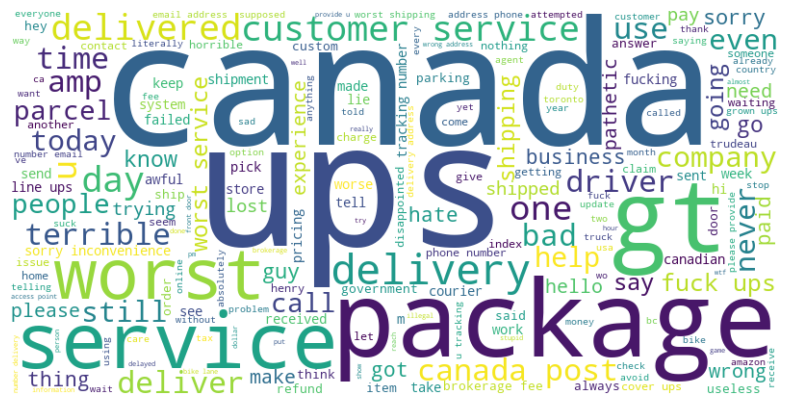

In [38]:
# Filter rows with sentiment scores close to -1
negative_df = ups_df[ups_df['sentiment'] <= -0.3]

# Concatenate all the words into a single string
words = ' '.join(sum(negative_df['tokenized_content'], []))

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(words)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

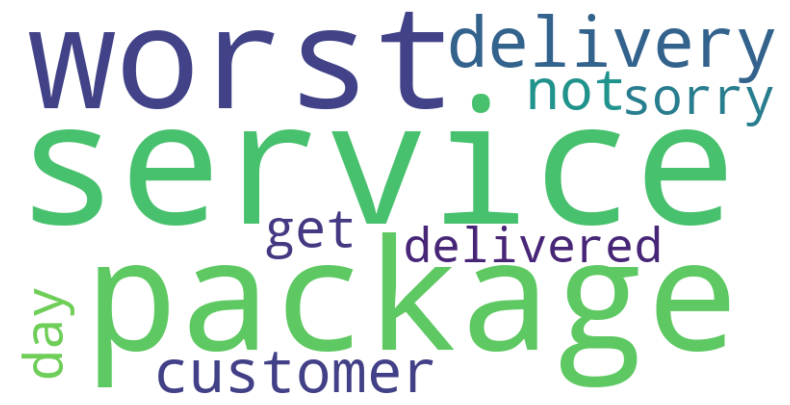

In [39]:
from collections import Counter
# Count the frequency of each word
word_counts = Counter(words.split())

# Get the top 5 words
top_words = word_counts.most_common(15)

# Exclude "canada" and "post" from top_words
filtered_top_words = [(word, count) for word, count in top_words if word not in ['canada', 'ups', 'gt', 'a', 'is', 'u']]

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(filtered_top_words))

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Neutral tweets

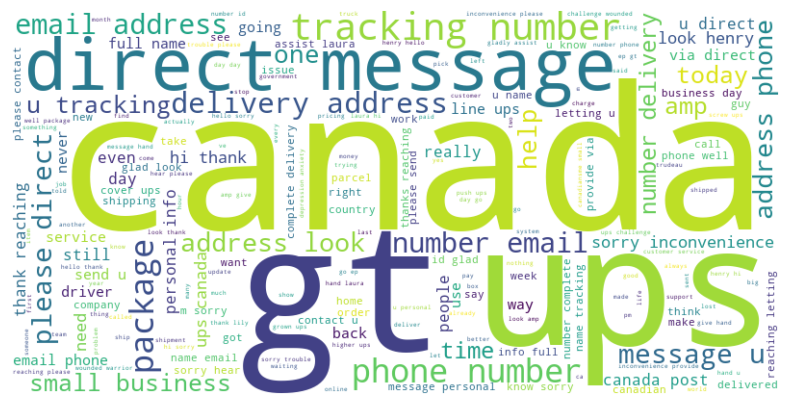

In [40]:
# Filter rows with sentiment scores close to -1
neutral_df = ups_df[(ups_df['sentiment'] > -0.3) & (ups_df['sentiment'] < 0.3)]

# Concatenate all the words into a single string
words = ' '.join(sum(neutral_df['tokenized_content'], []))

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(words)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Positive tweets

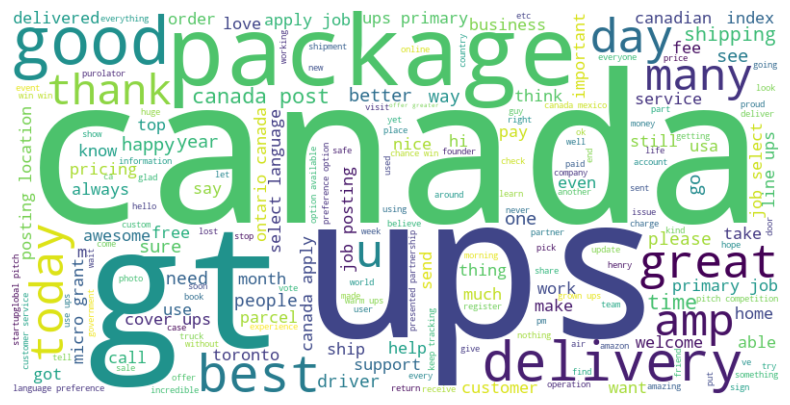

In [41]:
# Filter rows with sentiment scores close to -1
positive_df = ups_df[ups_df['sentiment'] >= 0.3]

# Concatenate all the words into a single string
words = ' '.join(sum(positive_df['tokenized_content'], []))

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(words)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [42]:
# Define conditions and corresponding values
conditions = [
    ups_df['sentiment']  >= 0.3,
    (ups_df['sentiment'] > -0.3) & (ups_df['sentiment'] < 0.3),
    ups_df['sentiment'] <= -0.3
]

values = ['Postive', 'Neutral', 'Negative']

In [43]:
ups_df['sentiment_type'] = np.select(conditions, values, default='Unknown')

In [44]:
ups_df.head()

,content,tokenized_content,sentiment,sentiment_type
0,"@user “medical authority” (only in the us and canada btw, they’re completely disregarding european med authorities)\n\nnot medical science. \n\nhuge difference\n\nif this medicine is so beneficial then why don’t any of the dozens of gender clinics around the us perform long term follow ups?","[a, medical, authority, a, u, canada, btw, a, completely, disregarding, european, med, authority, medical, science, huge, difference, medicine, beneficial, a, dozen, gender, clinic, around, u, perform, long, term, follow, ups]",0.075,Neutral
1,"our 2023 🌳🍎☀️wellness walk️ ☀️🍎🌳 was a huge hit! friends, food, &amp; nature — what could be better? 😊 \n\nbig shoutout to our amazing volunteers from @user @user @user &amp; @user ! the kids had a blast 🙌\n\n#beyond330 #toronto http","[2023, 🌳🍎☀️wellness, walk, ☀️🍎🌳, huge, hit, friend, food, amp, nature, a, could, better, a, big, shootout, amazing, volunteer, amp, kid, blast, a, beyond330, toronto]",0.375,Postive
2,"@user hello, we are truly sorry for the inconvenience caused. we would like to help you, could you send us your tracking number, email address, address and phone number via dm? -bryan http","[hello, truly, sorry, inconvenience, caused, would, like, help, could, send, u, tracking, number, email, address, address, phone, number, via, direct message, bryan]",-0.200,Neutral
3,@user @user same here in the great southern ontario canada.,"[great, southern, ontario, canada]",0.400,Postive
4,@user #harmony world 🌍 futuristic julia naimbale from namibia 🇳🇦 julia say ladies don’t have male elders here and from uganda and china on your prostate ups!,"[harmony, world, a, futuristic, julia, naimbale, namibia, gt, julia, say, lady, a, male, elder, uganda, china, prostate, ups]",0.000,Neutral


In [45]:
ups_df.to_csv('UPS Sentiment.csv', sep=',', index=False, encoding='utf-8')

In [46]:
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [47]:
#Count_values for sentiment
count_values_in_column(ups_df,'sentiment_type')

,Total,Percentage
Neutral,7846,78.47
Postive,1296,12.96
Negative,857,8.57


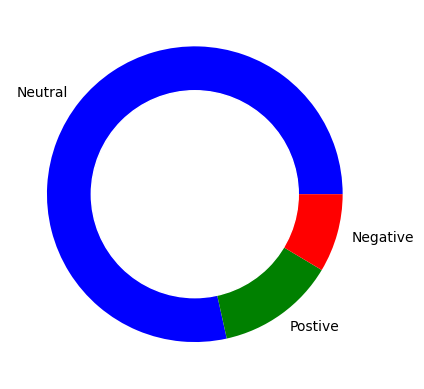

In [48]:
# create data for Pie Chart
piechart = count_values_in_column(ups_df,'sentiment_type')
names= piechart.index
size=piechart['Percentage']
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['blue','green','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [49]:
# Filter data for negative sentiment_type
negative_data = ups_df[ups_df['sentiment_type'] == 'Negative']

negative_data

,content,tokenized_content,sentiment,sentiment_type
7,@user toronto star let’s talk about @user screw ups not someone else’s. healthcare sold. education sold greenbelt sold but here he crawls out of his hole and you let him to complain about something he would have done for a dollar in his corrupt pocket.,"[toronto, star, let, a, talk, screw, ups, someone, else, a, healthcare, sold, education, sold, greenbul, sold, crawl, hole, let, complain, something, would, done, dollar, corrupt, pocket]",-0.500000,Negative
62,"@user @user trudeau is losing his memory.\nhe has been pm for 8 years.\nhe is to blame for all of canada's serious problems over 8 years of blunders, cover ups, trillions of pricing in debt, incompetence , corruption +++++","[trudeau, losing, memory, pm, a, year, blame, canada, is, serious, problem, a, year, blunder, cover, ups, trillion, pricing, debt, incompetence, corruption, +++++]",-0.333333,Negative
64,"ffs , poilievre is a wannabe fascist. no person of conscience would vote for him. gold grief 🇨🇦canada wake up &amp; learn from usa fvck ups.","[ff, poilievre, wannabe, fascist, person, conscience, would, vote, gold, grief, canada, wake, amp, learn, usa, fuck, ups]",-0.600000,Negative
69,"@user who can help me track a package with express saturday service in canada ?? i’m waiting and waiting but cutting time past already! i must have this package today , seems no one can contact the driver although it showing out for delivery","[help, track, package, express, saturday, service, canada, a, waiting, waiting, cutting, time, past, already, must, package, today, seems, one, contact, driver, although, showing, delivery]",-0.425000,Negative
70,@user you are the worst! been trying to retrieve a package with tracking # 1z860y540400398204 for almost 2 weeks now. your people have been giving me the run around,"[worst, trying, retrieve, package, tracking, 1z860y540400398204, almost, a, week, people, giving, run, around]",-1.000000,Negative
...,...,...,...,...
9972,psa reminder for us folks sending mail to canada: do your canadian friends/customers a favour and use usps or fedex! ups has the absolute worst broker fees for customs. i’ve regularly had to pay pricing25+ ‘customs’ on items only valued at pricing40. the worst.,"[psa, reminder, u, folk, sending, mail, canada, canadian, friends/customers, favour, use, uses, index, ups, absolute, worst, broker, fee, custom, a, regularly, pay, pricing25+, a, custom, a, item, valued, pricing, worst]",-0.450000,Negative
9974,@user worst service we can ever have from any courier . trying to get a shipment since last 3 days and every day same answer “on the way”… don’t know why to lie if not on way…..very bad of u ups😡😡😡😡,"[worst, service, ever, courier, trying, get, shipment, since, last, a, day, every, day, answer, a, way, a, a, a, know, lie, way, gt, bad, u, ups😡😡😡😡]",-0.566667,Negative
9976,i see the jam ups at airports internationally too but the reputational damage canada is suffering from the state of its airports/airlines is brutal.,"[see, jam, ups, airport, internationally, reputation, damage, canada, suffering, state, airports/airlines, brutal]",-0.437500,Negative
9981,"@user @user at least you got yours got delivered, our says delivered to front door, but it is a fail @user, no package to our store.","[least, got, got, delivered, say, delivered, front, door, fail, package, store]",-0.400000,Negative


In [50]:
negative_data.to_csv('UPS Negative Tweets.csv', sep=',', index=False, encoding='utf-8')